#### How many tweets were posted containing the term on each day?


In [56]:
import pandas as pd
df = pd.read_csv('correct_twitter_201904.tsv', sep='\t')
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce', utc=True)

if df['created_at'].isnull().all():
    print("Error: 'created_at' column could not be converted to datetime.")
else:
    def tweets_per_day(term):
        filtered_df = df[df['text'].str.contains(term, case=False, na=False)]
        daily_tweet_count = filtered_df.groupby(filtered_df['created_at'].dt.date)['id'].count()
        return daily_tweet_count.reset_index(name='tweet_count')
    result = tweets_per_day("music")
    print(result)

    created_at  tweet_count
0   2019-03-12            3
1   2019-04-06            1
2   2019-04-14            1
3   2019-04-16            1
4   2019-04-21            1
5   2019-04-24            1
6   2019-04-26            1
7   2019-04-27            3
8   2019-04-28           22
9   2019-04-29          118
10  2019-04-30          135
11  2019-05-01           71
12  2019-05-02           72
13  2019-05-03          103
14  2019-05-04           75
15  2019-05-05           65
16  2019-05-06           71
17  2019-05-07           64
18  2019-05-08           60
19  2019-05-09           70
20  2019-05-10          307
21  2019-05-11           78
22  2019-05-12           69
23  2019-05-13           50
24  2019-05-14           67
25  2019-05-15           99
26  2019-05-16           91
27  2019-05-17          162
28  2019-05-18           61
29  2019-05-19           46
30  2019-05-20           64
31  2019-05-21          119
32  2019-05-22           80
33  2019-05-23           73
34  2019-05-24      

#### How many unique users posted a tweet containing the term?

In [57]:
def unique_users_posting_term(term):
    filtered_df = df[df['text'].str.contains(term, case=False, na=False)]
    unique_user_count = filtered_df['author_id'].nunique()
    return unique_user_count
result = unique_users_posting_term("music")
print(f"Number of unique users posting tweets containing the term: {result}")

Number of unique users posting tweets containing the term: 2109


#### How many likes did tweets containing the term get, on average?

In [58]:
def average_likes_for_term(term):
    filtered_df = df[df['text'].str.contains(term, case=False, na=False)]
    average_likes = filtered_df['like_count'].mean()
    return average_likes
result = average_likes_for_term("music")
print(f"Average number of likes for tweets containing the term: {result:.2f}")

Average number of likes for tweets containing the term: 161.41


#### Where (in terms of place IDs) did the tweets come from?

In [59]:
def place_ids_for_term(term):
    filtered_df = df[df['text'].str.contains(term, case=False, na=False)]
    unique_place_ids = filtered_df['place_id'].dropna().unique()
    return unique_place_ids
result = place_ids_for_term("music")
print(f"Unique place IDs for tweets containing the term: {result}")

Unique place IDs for tweets containing the term: ['53504716d445dcad' 'ab2f2fac83aa388d' '0113afc024d5e0bc'
 '300bcc6e23a88361' '8e9665cec9370f0f' 'd56c5babcffde8ef'
 '01153d1b33e1641b' '09f6a7707f18e0b1' '714789cf3b7a50d0'
 '01fbe706f872cb32' '1a7a70d4a28e96a1' 'f97108ab3c4a42ed'
 'ac88a4f17a51c7fc' '5de8cffc145c486b' '3f7a925ec706ea48'
 '001aff55522d96c9' '4c8e28554110ebcf' '5c62ffb0f0f3479d'
 '3b77caf94bfc81fe' 'ecbe2aea853af44e' 'de599025180e2ee7'
 '00b673715a35dfa7' '43d2418301bf1a49' '07e9c7d1954fff64'
 '0570f015c264cbd9' '0149775319466b18' '91890dbb74364d63'
 '01ddb0100b1efd97' 'b49b3053b5c25bf5' '7cb7440bcf83d464'
 '151b9e91272233d1' '9d63050d3d33d32f' '140800566259f12f'
 '743df94d8dcb69a6' '8bc4eeacf63235f9' '8943f93b51e3f357'
 '2bc7c264a080898b' '814cfc71b843ff40' '2b8922cbe7f16337'
 '7de31e05e99a00f8']


#### What times of day were the tweets posted at? 

In [60]:
def times_of_day_for_term(term):
    filtered_df = df[df['text'].str.contains(term, case=False, na=False)]
    tweet_hours = filtered_df['created_at'].dt.hour
    hour_distribution = tweet_hours.value_counts().sort_index()
    return hour_distribution
result = times_of_day_for_term("music")
print(f"Number of tweets posted at each hour of the day:\n{result}")

Number of tweets posted at each hour of the day:
created_at
0     159
1     154
2     166
3     155
4     135
5     119
6      89
7      85
8      99
9      94
10     70
11     55
12    107
13    130
14    151
15    147
16    122
17    137
18    152
19    163
20    120
21    110
22    146
23    136
Name: count, dtype: int64


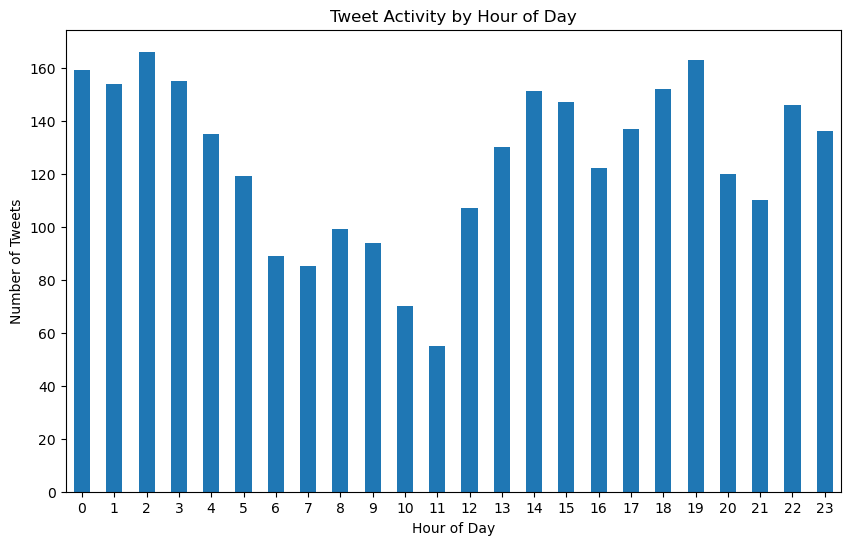

In [61]:
import matplotlib.pyplot as plt
result.plot(kind='bar', figsize=(10, 6))
plt.title('Tweet Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [62]:
def most_frequent_user_for_term(term):
    filtered_df = df[df['text'].str.contains(term, case=False, na=False)]
    tweet_counts_by_user = filtered_df['author_id'].value_counts()
    top_user = tweet_counts_by_user.idxmax()  # User ID with the most tweets
    top_user_tweet_count = tweet_counts_by_user.max()  # Number of tweets by this user
    return top_user, top_user_tweet_count
user, tweet_count = most_frequent_user_for_term("music")
print(f"The user who posted the most tweets containing the term is: {user}")
print(f"Number of tweets posted by this user: {tweet_count}")

The user who posted the most tweets containing the term is: 118301422
Number of tweets posted by this user: 90
